In [45]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.metrics import roc_curve, auc
import pydotplus

In [46]:
data = pd.read_csv("diabetes.csv")
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin', 'BMI',	'DiabetesPedigreeFunction','Age']
X = data[feature_cols] # Features
y = data['Outcome'] # Target variable

Split dataset into test and train sets that we will use later. We will use 30% of the initial set for validation purpose. 

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Create Decision Tree Classifier model and specify arguments to tune model. 

In [48]:
clf = DecisionTreeClassifier(criterion="entropy", splitter='best', max_depth =None, min_samples_split =5, 
                             min_samples_leaf = 15, max_features = "auto"  )
clf = clf.fit(X_train,y_train)


Check model results on test data we have saved previously.

In [49]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

**Criterion can be 'entropy' or 'gini' where:**
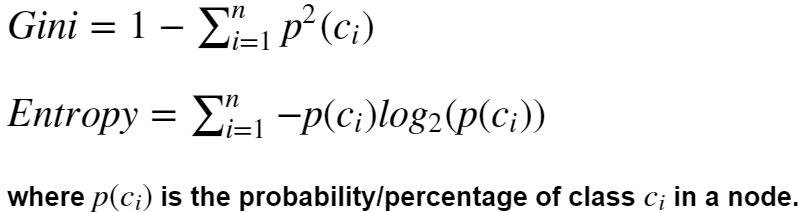
**Entropy** = Entropy of a random variable is the average level of "information", "surprise", or "uncertainty" inherent in the variable's possible outcomes. Information gain is the entropy of parent node minus sum of weighted entropies of child nodes.  Weight of a child node is number of samples in the node/total samples of all child nodes. The closer score is to 0.5 the higher uncertainty / randomness in the set.

**Gini score** = The Gini coefficient is a measure of inequality of a distribution. It is defined as a ratio with values between 0 and 1: the numerator is the area between the Lorenz curve of the distribution and the uniform distribution line. 0 stands for equality in distributon. Then lower Gini score is the more impurity in the node.


**max_depth** = How many nodes can be created by algorithm. Good for very long and complicated trees however can highly impact the result. We can use other options as min_samples_split or min_samples_leaf to deacrese number of splits in more natural way.

**min_samples_leaf** = Minimum samples that should contain last node(leaf) 

**min_samples_split** = Is node sample will be equal or less then this number then no further split will be processed. 

**max_features** = The way algorihtm check which feature should be took under consideration for next split. (Affects mostly time needed to complete script)

StringIO is  file-like object that we will use to store image of create tree. 

In [50]:
dot_data = StringIO()

Export our model to image where clf is model data. 
We will use feature columns to describe split data and hardcoded data for outcome - 0 and 1

In [51]:
tree.export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

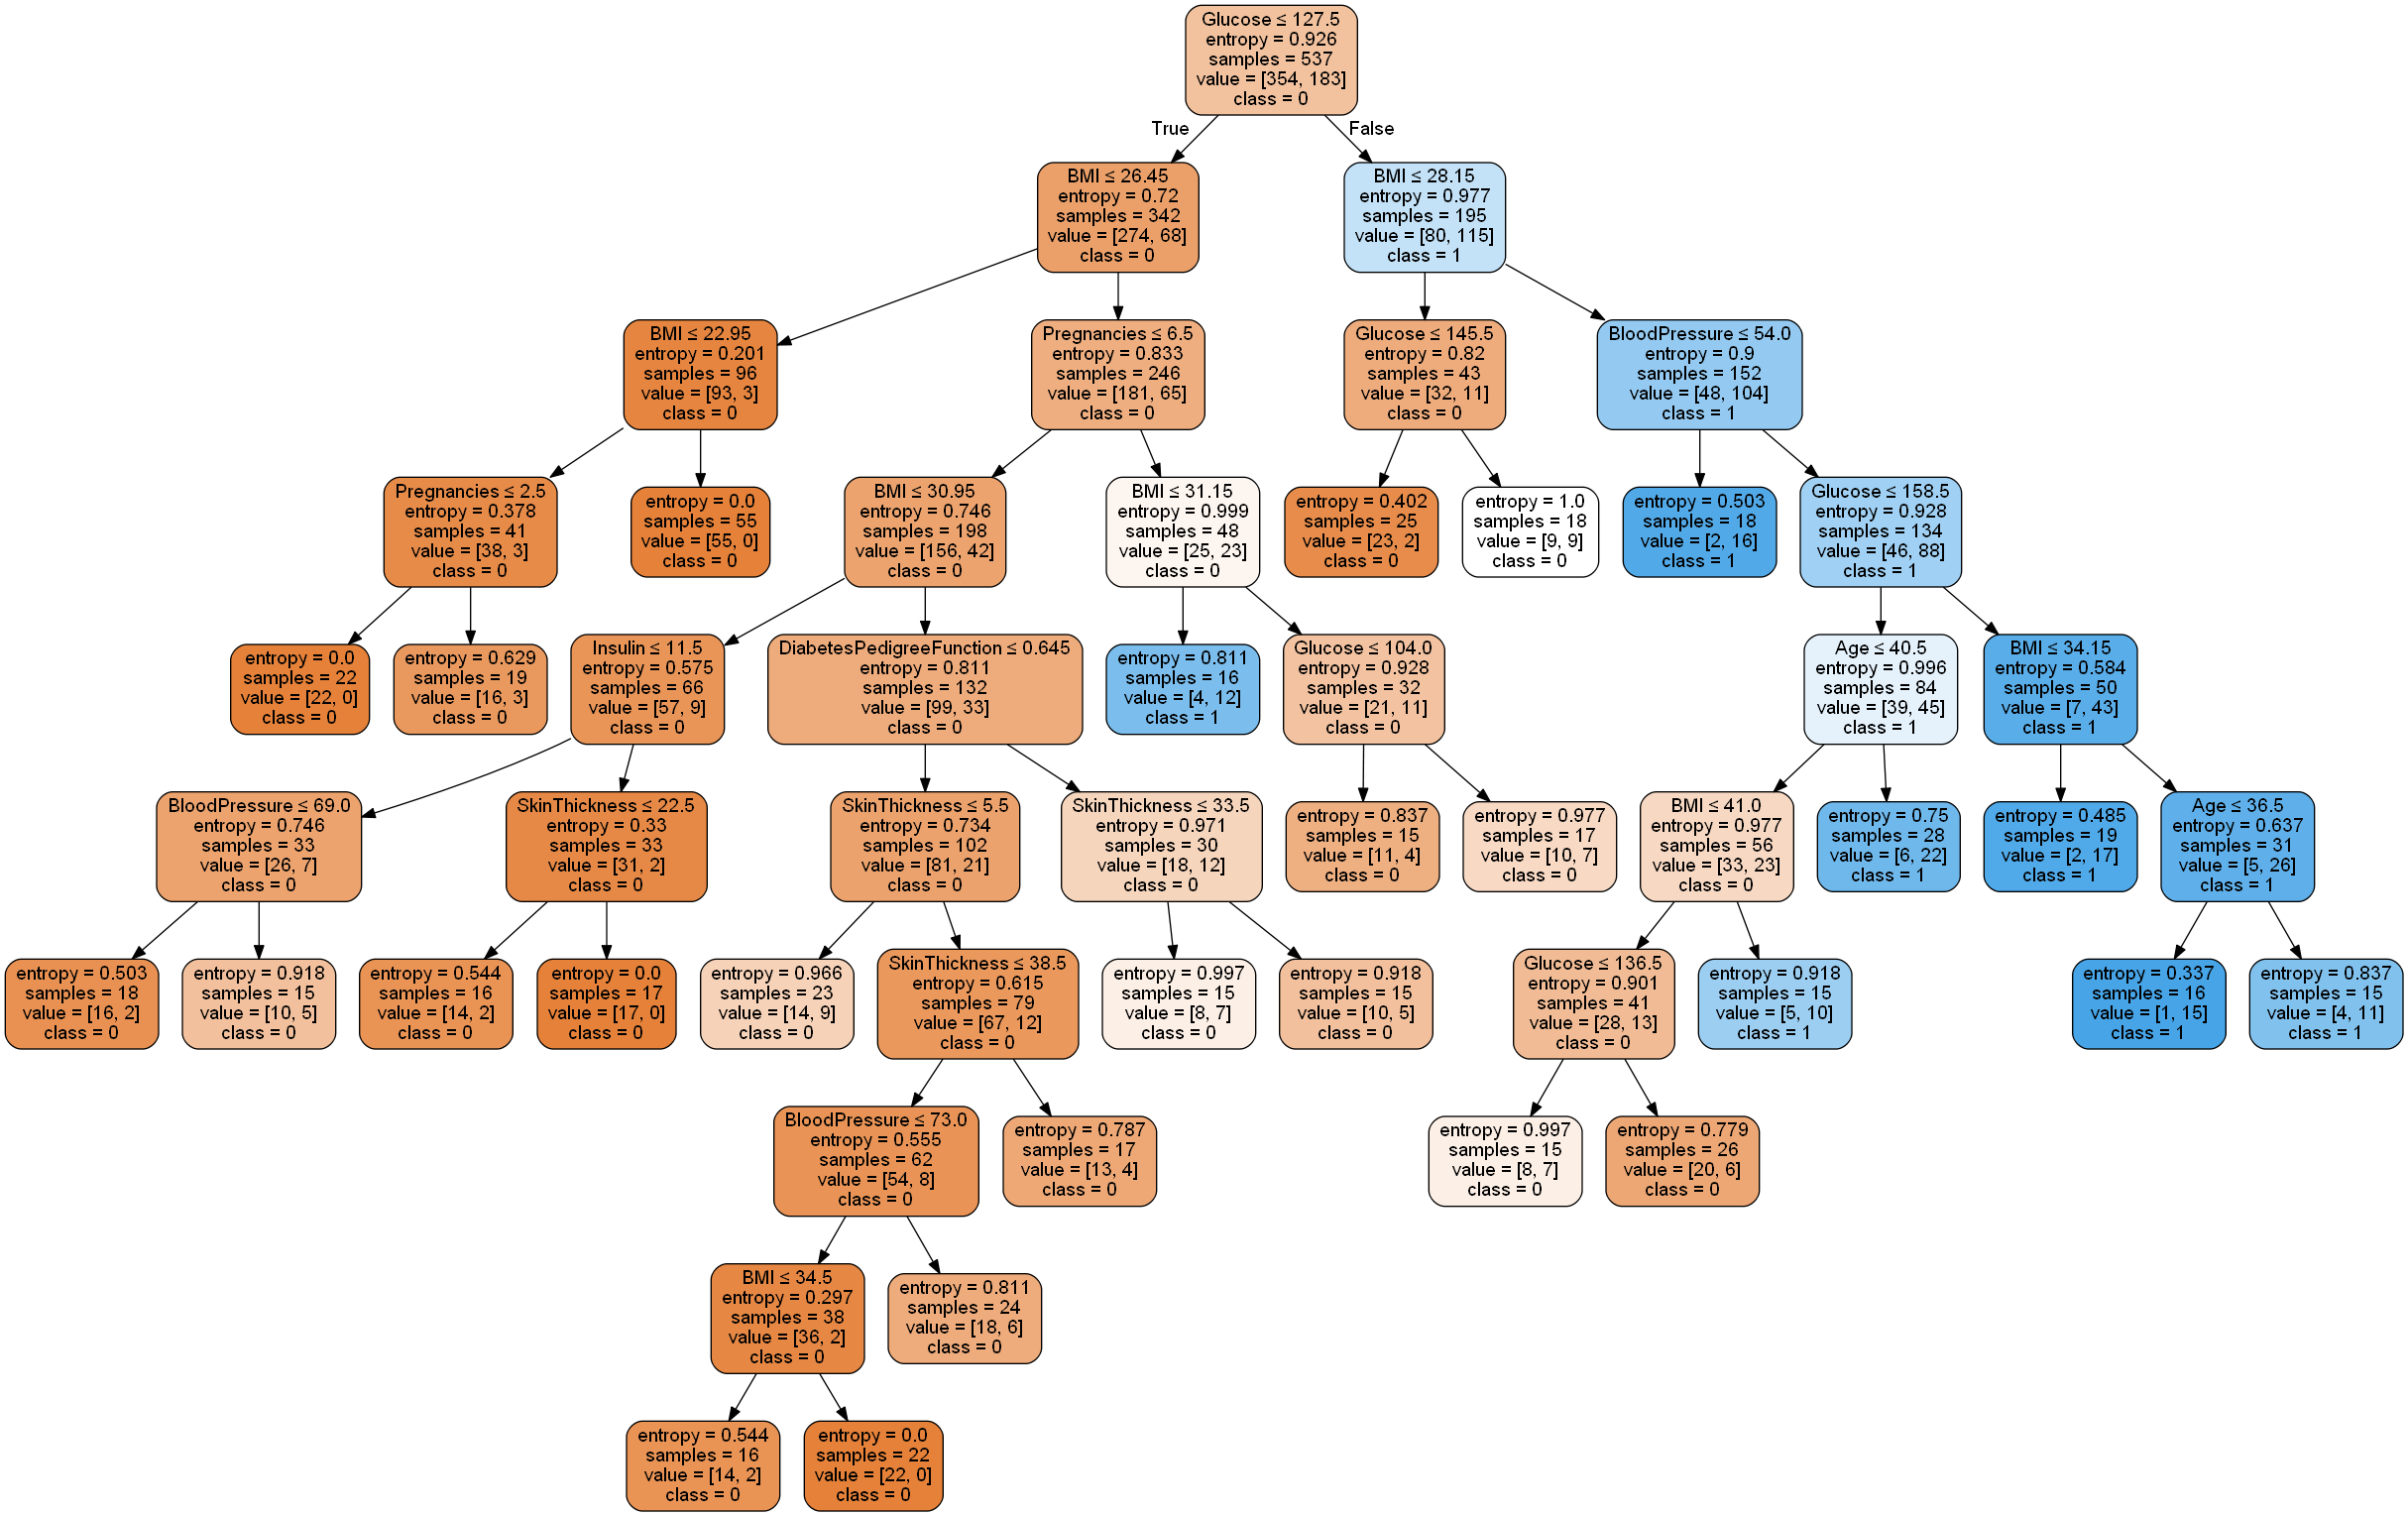

In [52]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

***Same problem as above just with use of Random (Decision Tree) Forest algorithm.***

In [54]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, min_samples_leaf=1,
min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1, oob_score=False, random_state=None, 
                               verbose=0, warm_start=False)
y_pred = rf.predict(X_test)


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.7560032232070909


**DecisionTreeClassifier** - this algorithm process classification with use of only one tree in the process. This makes him easy to read and interpret. However single tree is more prone to various biases and errors.

**RandomForestClassifier** - this algorithm use the same data to to create multiple  (equal to n_estimators) trees. Then based on output from each tree model "votes" for optimal parameters based on will generate final output. 